In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
collision_train = pd.read_csv("train_data-Dell.csv")
#collision_train.info()
#collision_train.head()

In [3]:
collision_test = pd.read_csv("test_data-Dell.csv")
#collision_test.info()
#collision_test.head()

Dummy encoding converts a variable that has n possible distinct values, into n-1 binary variables. 

For regression-type problems Dummy Encoding is preferable as we wish to avoid perfect collinearity between the binary variables that are being generated by the encoding. In the classification problem however, we are not concerned about inflating factors and hence can choose either of the two schemes. They will produce equivalent encodings.

By default pd.get_dummies() does one-hot enocoding. To do dummy encoding, you need to pass the parameter drop_first=True.

In [4]:
categorical_columns = collision_train.select_dtypes(include=['object']).columns

#print("Categorical columns train:")
#print(categorical_columns)

#test
categorical_columns_test = collision_test.select_dtypes(include=['object']).columns

#print("Categorical columns test:")
#print(categorical_columns_test)


In [5]:
# Copy the DataFrame to avoid chained assignment issues
collision_train_copy = collision_train.copy()

# Drop rows with any NaN values
collision_train_copy.dropna(inplace=True)

# Replace missing values in 'c_object_type' column with the mode of non-NaN values
mode_c_object_type = collision_train_copy['c_object_type'].mode()[0]  # Get the mode value
collision_train_copy['c_object_type'].fillna(mode_c_object_type, inplace=True)

# Creating dummy variables
dummy_columns = pd.get_dummies(collision_train_copy['c_object_type'], prefix='c_object_type')

# Concatenating the original DataFrame with the dummy variables
new_collision_train = pd.concat([collision_train_copy, dummy_columns], axis=1)

# Dropping the original 'c_object_type' column
new_collision_train.drop('c_object_type', axis=1, inplace=True)

# Displaying the new DataFrame
print(new_collision_train)


       event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
5             1     6.530455           5  -7.561299          -7.254301   
6             1     5.561646           5  -9.315693          -7.468904   
7             1     5.226504           5  -7.422508          -7.051001   
8             1     3.570013           5  -9.248105          -7.327533   
29            3     6.950088          19  -9.568315          -7.057793   
...         ...          ...         ...        ...                ...   
70096      5638     1.441664           2 -30.000000          -5.937042   
70097      5638     1.259823           2 -30.000000          -5.936667   
70098      5638     0.852358           2 -30.000000          -5.936667   
70099      5638     0.512948           2 -30.000000          -5.934047   
70100      5638     0.228585           2 -30.000000          -6.259953   

       max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
5              2.746782         

/tmp/ipykernel_60394/2765172438.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  collision_train_copy['c_object_type'].fillna(mode_c_object_type, inplace=True)


In [6]:
# Repeat the same process for the test
# Copy the DataFrame to avoid chained assignment issues
collision_test_copy = collision_test.copy()

# Drop rows with any NaN values
collision_test_copy.dropna(inplace=True)

# Replace missing values in 'c_object_type' column with the mode of non-NaN values
mode_c_object_type_test = collision_test_copy['c_object_type'].mode()[0]  # Get the mode value
collision_test_copy['c_object_type'].fillna(mode_c_object_type_test, inplace=True)

# Creating dummy variables
dummy_columns_test = pd.get_dummies(collision_test_copy['c_object_type'], prefix='c_object_type')

# Concatenating the original DataFrame with the dummy variables
new_collision_test = pd.concat([collision_test_copy, dummy_columns_test], axis=1)

# Dropping the original 'c_object_type' column
new_collision_test.drop('c_object_type', axis=1, inplace=True)

# Displaying the new DataFrame
print(new_collision_test)


       event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
37            4     6.702359           5 -30.000000          -6.957818   
38            4     6.351916           5  -6.657380          -6.283746   
39            4     6.038843           5  -6.884722          -6.387534   
40            4     5.705221           5  -6.868061          -6.378408   
41            4     5.038975           5  -9.558462          -6.828566   
...         ...          ...         ...        ...                ...   
24464      2165     3.596498           2 -14.871278          -6.488518   
24465      2165     3.290859           2 -13.675101          -6.458296   
24466      2165     2.950547           2 -13.856673          -6.463442   
24467      2165     2.570998           2 -13.486516          -6.450629   
24468      2165     2.263915           2 -13.484391          -6.450751   

       max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
37            88.002734        1

/tmp/ipykernel_60394/1434563843.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  collision_test_copy['c_object_type'].fillna(mode_c_object_type_test, inplace=True)


In [7]:
#transform data to proper scale for train
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
new_collision_train_scaled = scaler.fit_transform(new_collision_train)

# Convert the scaled data back to a DataFrame
new_collision_train_scaled = pd.DataFrame(new_collision_train_scaled, columns=new_collision_train.columns)


In [ ]:
#option for test
new_collision_test_scaled = scaler.transform(new_collision_test)

new_collision_test_scaled = pd.DataFrame(new_collision_test_scaled, columns=new_collision_test.columns)

In [9]:
X_train = new_collision_train_scaled.drop(columns=['time_to_tca']).values
y_train = new_collision_train_scaled['time_to_tca'].values

In [10]:
from sklearn.ensemble import RandomForestRegressor

#Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 40, num = 10)]
n_estimators = [20,40,60,80]
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [11]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [20, 40, 60, 80], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [12]:
regressor = RandomForestRegressor()

In [13]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 3, verbose=2)

In [14]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   5.8s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   5.8s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   5.8s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=  11.6s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=  11.6s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=  11.6s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=  17.4s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=  17.5s
[CV] END bootstrap

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 40, 60, 80]},
             verbose=2)

In [15]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [17]:
# Initialize the RandomForestRegressor with the best parameters
#best_estimator = rf_Grid.best_estimator_
regressor = RandomForestRegressor(bootstrap=True, max_depth=4, min_samples_leaf=2, 
                                   min_samples_split=2, n_estimators=80)

# Fit the model to your training data
regressor.fit(X_train, y_train)  




RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=80)

In [18]:
X_test = new_collision_test_scaled.drop(columns=['time_to_tca']).values
y_test = new_collision_test_scaled['time_to_tca'].values

In [19]:
# Prediction on the testing dataset
# Prediction on the testing dataset
y_test_pred = regressor.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Evaluating on test set

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 0.14888401978606702
Mean Squared Error (MSE): 0.034034965367355244
Root Mean Squared Error (RMSE): 0.18448567794643367
R^2 Score: 0.15824102232090964


In [21]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_test_pred)

print('The EVS of the test is: %.2f' % evs)

The EVS of the test is: 0.20


In [22]:
#Prediction on the training set

y_train_pred = regressor.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 0.13681312192614037
Mean Squared Error (MSE): 0.03008379886569868
Root Mean Squared Error (RMSE): 0.1734468185516779
R^2 Score: 0.6240712906573175


In [23]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_train, y_train_pred)

print('The EVS of the train is: %.2f' % evs)

The EVS of the train is: 0.62


In [24]:
# Create loop throuth x columns
feature_list = [f"feature_{i}" for i in range(X_train.shape[1])]

# Create a pandas Series with feature importances
feature_imp = pd.Series(regressor.feature_importances_, index=feature_list).sort_values(ascending = False)

print("List of important features:", feature_imp)

List of important features: feature_32     0.665639
feature_62     0.121223
feature_2      0.119675
feature_76     0.029660
feature_24     0.019725
                 ...   
feature_35     0.000000
feature_34     0.000000
feature_33     0.000000
feature_31     0.000000
feature_104    0.000000
Length: 105, dtype: float64


In [34]:
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'


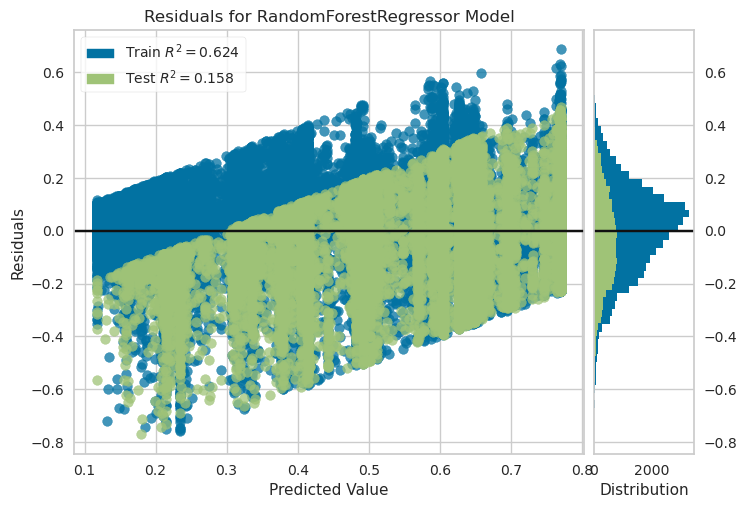

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the visualizer with the trained regressor model
visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

